In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize

In [2]:
import nltk
nltk.download('stopwords')

import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marinannacarini/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/marinannacarini/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
country_df = pd.read_csv('mental_health_corr.csv')
country_df['negative_per'] = country_df['negative'] / country_df['total comments']
country_df['positive_per'] = country_df['positive'] / country_df['total comments']
country_df.head()

,Country,Country Full,negative,neutral,positive,total comments,alcohol consumption per year,Suicides Per 100000,Depression,happiness score,pop,negative_per,positive_per
0,AE,United Arab Emirates,8.0,16.0,9.0,33,20.5,2.8,9991.089,6.825,9991.089,0.242424,0.272727
1,AF,Afghanistan,1.0,3.0,NaN,4,33.5,4.7,39835.428,3.203,39835.428,0.250000,NaN
2,AI,Anguilla,1.0,NaN,1.0,2,NaN,NaN,NaN,NaN,NaN,0.500000,0.500000
3,AL,Albania,1.0,1.0,NaN,2,14.6,6.3,2872.933,4.719,2872.933,0.500000,NaN
4,AM,Armenia,NaN,NaN,1.0,1,21.3,6.6,2968.127,4.559,2968.127,NaN,1.000000


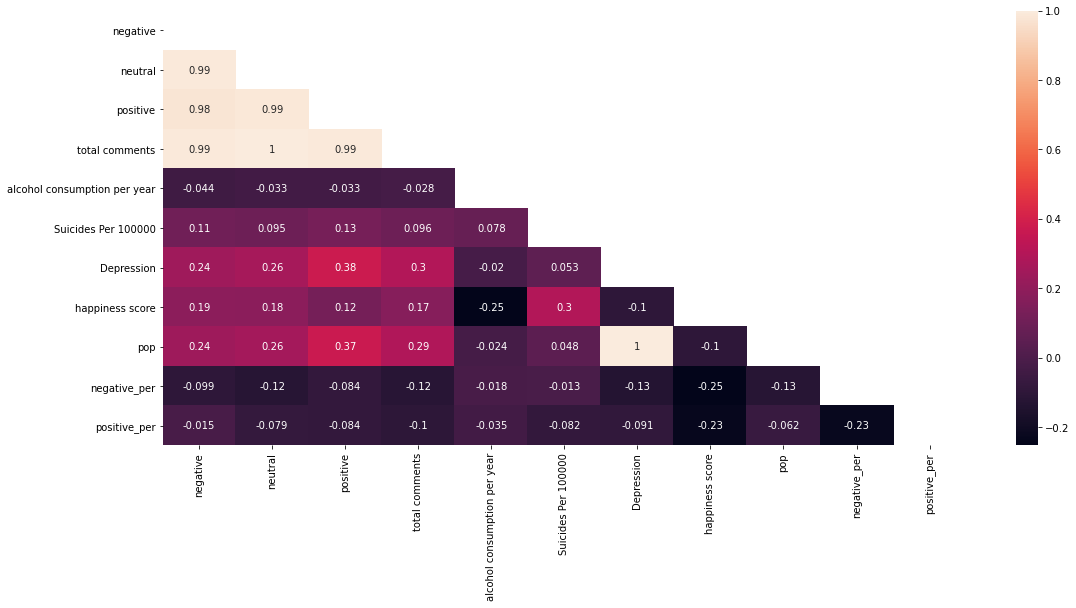

In [4]:
plt.figure(figsize=(18,8))
mask = np.zeros_like(country_df.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#sns.heatmap(neg_df.corr(),annot=True,mask = mask|(neg_df()<0.6),annot_kws={"weight": "bold"}, cbar=False)
sns.heatmap(country_df.corr(),annot=True,mask = mask)
plt.show()

In [5]:
neg_df = country_df.drop(['neutral', 'positive', 'total comments', 'pop', 'negative', 'positive_per'], axis = 1)
neg_df = neg_df.dropna()
neg_df.head()

,Country,Country Full,alcohol consumption per year,Suicides Per 100000,Depression,happiness score,negative_per
0,AE,United Arab Emirates,20.5,2.8,9991.089,6.825,0.242424
1,AF,Afghanistan,33.5,4.7,39835.428,3.203,0.250000
3,AL,Albania,14.6,6.3,2872.933,4.719,0.500000
7,AR,Argentina,14.6,9.2,45605.826,6.086,0.188119
9,AT,Austria,14.9,15.6,9043.070,7.246,0.142857


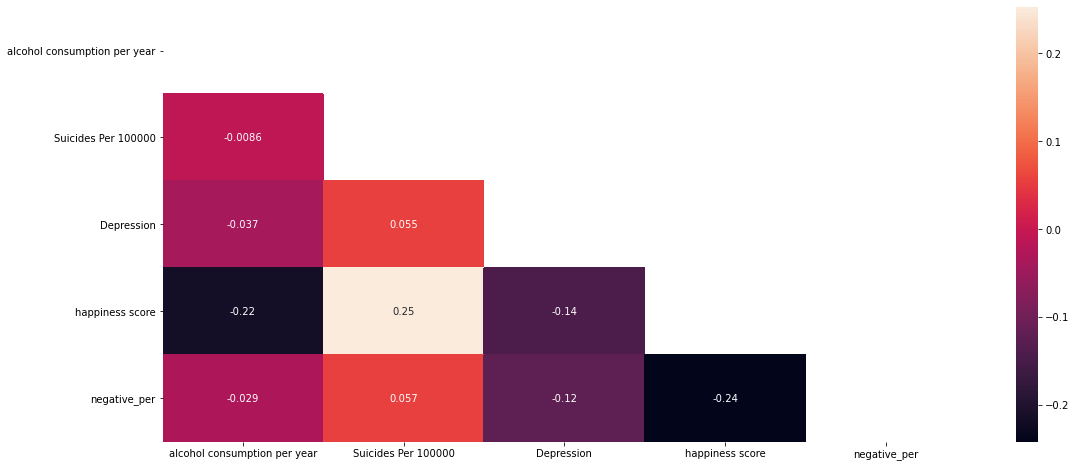

In [6]:
plt.figure(figsize=(18,8))
mask = np.zeros_like(neg_df.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#sns.heatmap(neg_df.corr(),annot=True,mask = mask|(neg_df()<0.6),annot_kws={"weight": "bold"}, cbar=False)
sns.heatmap(neg_df.corr(),annot=True,mask = mask)
plt.show()

In [7]:
pos_df = country_df.drop(['neutral', 'negative', 'total comments'], axis = 1)
pos_df = pos_df.dropna()
pos_df.head()

,Country,Country Full,positive,alcohol consumption per year,Suicides Per 100000,Depression,happiness score,pop,negative_per,positive_per
0,AE,United Arab Emirates,9.0,20.5,2.8,9991.089,6.825,9991.089,0.242424,0.272727
7,AR,Argentina,25.0,14.6,9.2,45605.826,6.086,45605.826,0.188119,0.247525
9,AT,Austria,5.0,14.9,15.6,9043.070,7.246,9043.070,0.142857,0.357143
10,AU,Australia,37.0,13.4,13.2,25788.215,7.228,25788.215,0.247934,0.152893
13,BD,Bangladesh,6.0,0.9,5.9,166303.498,4.456,166303.498,0.058824,0.352941


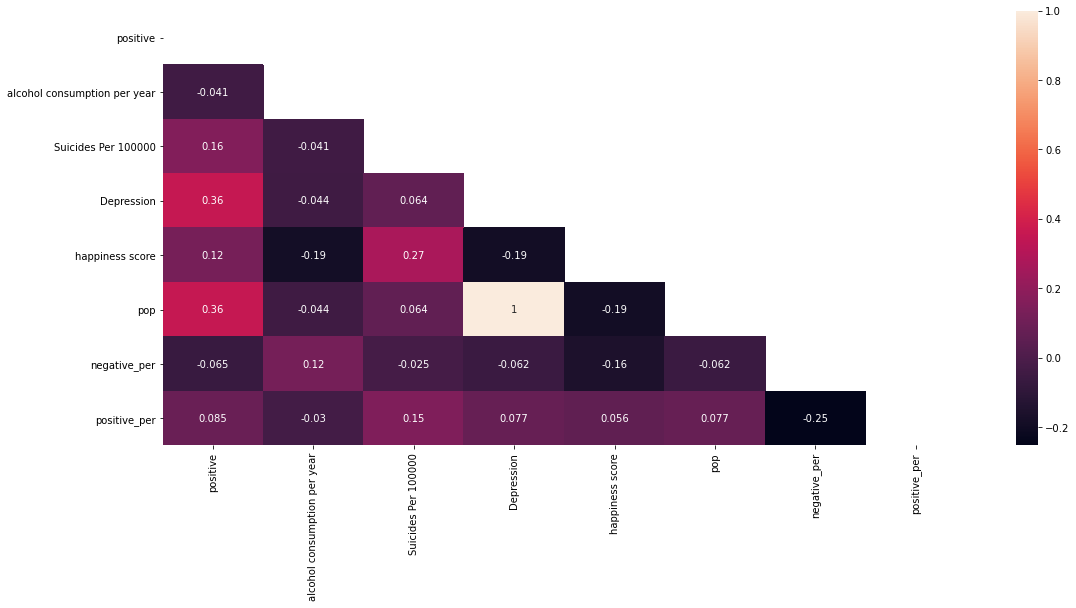

In [8]:
plt.figure(figsize=(18,8))
mask = np.zeros_like(pos_df.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(pos_df.corr(),annot=True,mask = mask)
plt.show()

In [9]:
tot_df = country_df.drop(['neutral', 'negative', 'positive', 'pop', 'negative_per'], axis = 1)
tot_df = tot_df.dropna()
tot_df.head()

,Country,Country Full,total comments,alcohol consumption per year,Suicides Per 100000,Depression,happiness score,positive_per
0,AE,United Arab Emirates,33,20.5,2.8,9991.089,6.825,0.272727
4,AM,Armenia,1,21.3,6.6,2968.127,4.559,1.000000
7,AR,Argentina,101,14.6,9.2,45605.826,6.086,0.247525
9,AT,Austria,14,14.9,15.6,9043.070,7.246,0.357143
10,AU,Australia,242,13.4,13.2,25788.215,7.228,0.152893


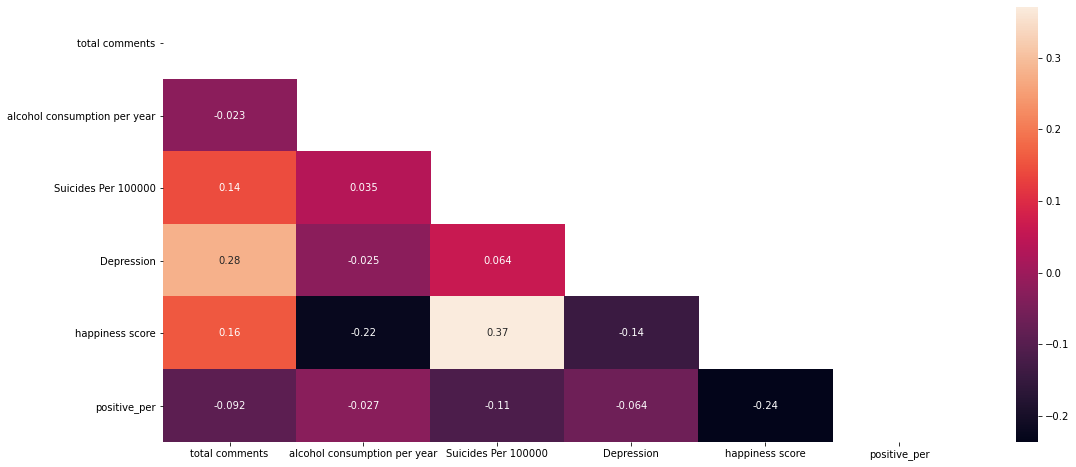

In [10]:
plt.figure(figsize=(18,8))
mask = np.zeros_like(tot_df.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(tot_df.corr(),annot=True,mask = mask)
plt.show()

In [11]:
# Word cloud for policy types occurence
from wordcloud import WordCloud, ImageColorGenerator

wordcloud = WordCloud(max_words=15,max_font_size=50,colormap='Set3', background_color="black").generate_from_frequencies(policy_frequency)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(8,5))
plt.show()

NameError: name 'policy_frequency' is not defined

In [16]:
tot_depression = country_df.drop(['neutral', 'negative', 'positive', 'positive_per','pop', 'negative_per', 'Suicides Per 100000', 'happiness score', 'alcohol consumption per year'], axis = 1)
tot_depression = tot_depression.dropna()
tot_depression.head()

,Country,Country Full,total comments,Depression
0,AE,United Arab Emirates,33,9991.089
1,AF,Afghanistan,4,39835.428
3,AL,Albania,2,2872.933
4,AM,Armenia,1,2968.127
5,AO,Angola,2,33933.610


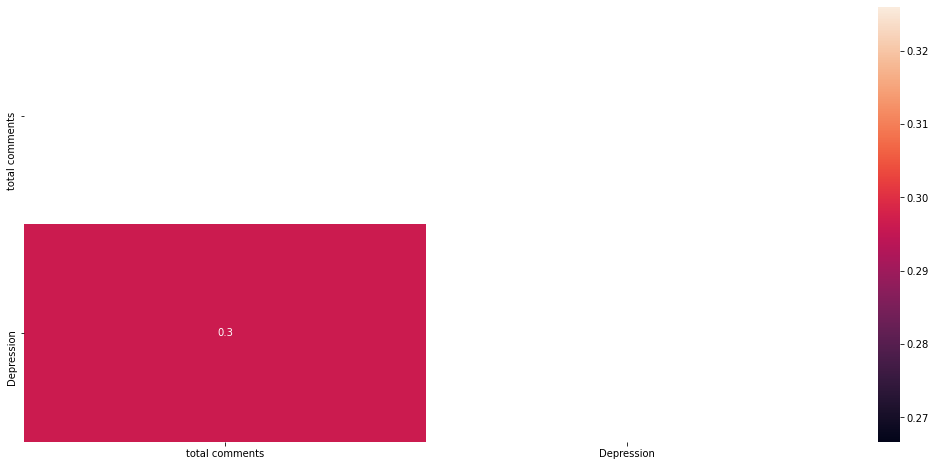

In [17]:
plt.figure(figsize=(18,8))
mask = np.zeros_like(tot_depression.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(tot_depression.corr(),annot=True,mask = mask)
plt.show()

In [18]:
neg_per_depression = country_df.drop(['neutral', 'negative_per', 'positive', 'positive_per','pop', 'total comments', 'Suicides Per 100000', 'Depression', 'alcohol consumption per year'], axis = 1)
neg_per_depression = neg_per_depression.dropna()
neg_per_depression.head()

,Country,Country Full,negative,happiness score
0,AE,United Arab Emirates,8.0,6.825
1,AF,Afghanistan,1.0,3.203
3,AL,Albania,1.0,4.719
7,AR,Argentina,19.0,6.086
9,AT,Austria,2.0,7.246


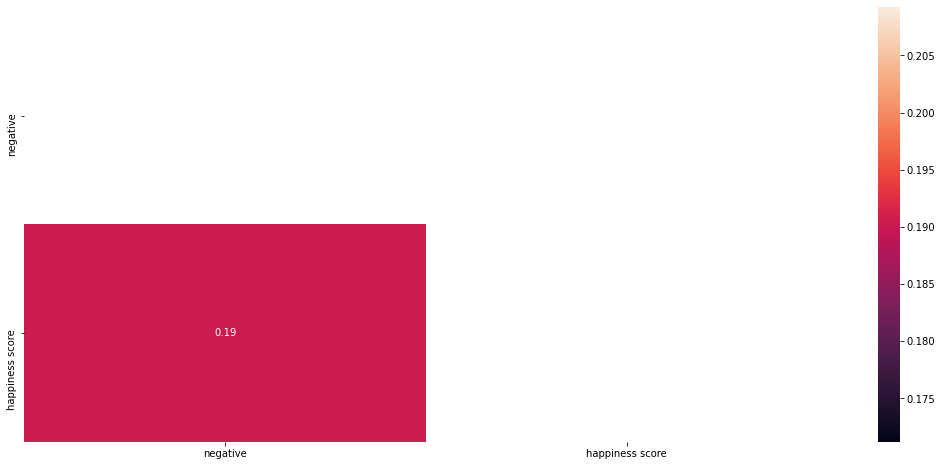

In [19]:
plt.figure(figsize=(18,8))
mask = np.zeros_like(neg_per_depression.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(neg_per_depression.corr(),annot=True,mask = mask)
plt.show()

In [20]:
pos_depression = country_df.drop(['neutral', 'negative_per', 'positive', 'negative','pop', 'total comments', 'Suicides Per 100000', 'happiness score', 'alcohol consumption per year'], axis = 1)
#pos_depression = country_df.drop(['neutral', 'negative_per', 'positive_per', 'negative','pop', 'total comments'], axis = 1)
pos_depression = pos_depression.dropna()
pos_depression.head()

,Country,Country Full,Depression,positive_per
0,AE,United Arab Emirates,9991.089,0.272727
4,AM,Armenia,2968.127,1.000000
5,AO,Angola,33933.610,1.000000
7,AR,Argentina,45605.826,0.247525
9,AT,Austria,9043.070,0.357143


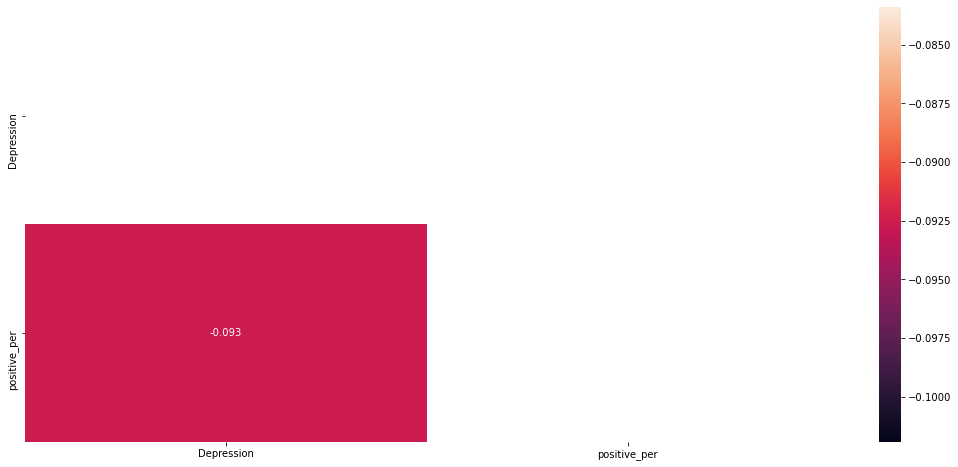

In [21]:
plt.figure(figsize=(18,8))
mask = np.zeros_like(pos_depression.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(pos_depression.corr(),annot=True,mask = mask)
plt.show()

Social Media Data

In [22]:
social_df = pd.read_csv('social_mental_health.csv')
social_df['negative_per'] = social_df['negative'] / social_df['total comments']
social_df['positive_per'] = social_df['positive'] / social_df['total comments']
social_df.head()


,Row Labels,Country Full,negative,neutral,positive,total comments,alcohol consumption per year,Suicides Per 100000,Depression,happiness score,negative_per,positive_per
0,AE,United Arab Emirates,4.0,9.0,8.0,21,20.5,2.8,9991.089,6.825,0.190476,0.380952
1,AF,Afghanistan,NaN,3.0,NaN,3,33.5,4.7,39835.428,3.203,NaN,NaN
2,AI,Anguilla,1.0,NaN,1.0,2,NaN,NaN,NaN,NaN,0.500000,0.500000
3,AM,Armenia,NaN,NaN,1.0,1,21.3,6.6,2968.127,4.559,NaN,1.000000
4,AO,Angola,NaN,NaN,2.0,2,13.4,4.7,33933.610,NaN,NaN,1.000000


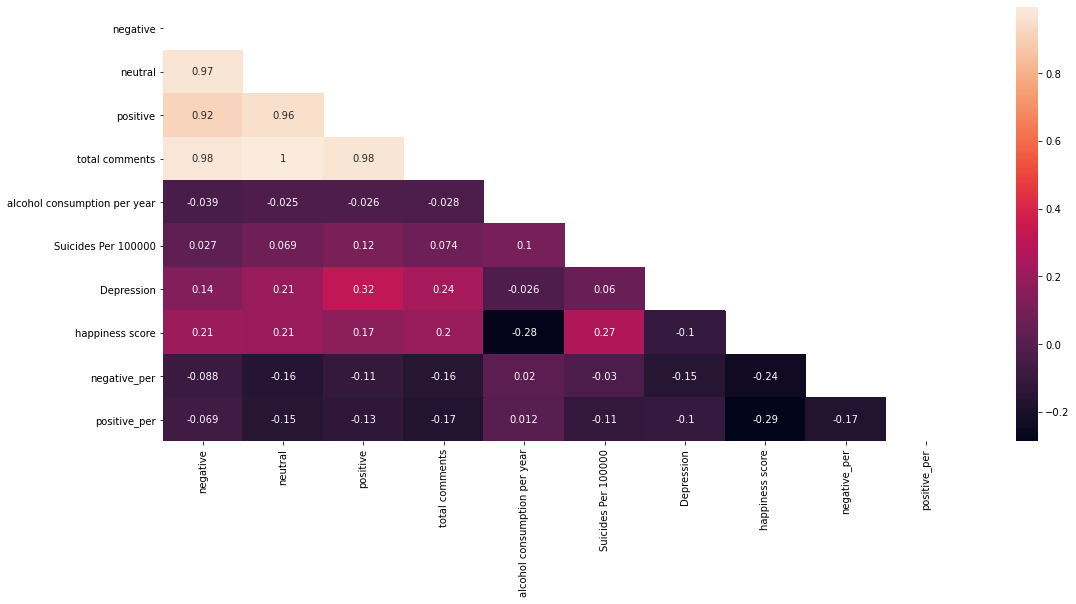

In [23]:
plt.figure(figsize=(18,8))
mask = np.zeros_like(social_df.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(social_df.corr(),annot=True,mask = mask)
plt.show()

In [24]:
social_pos_dep = social_df.drop(['negative', 'neutral', 'total comments','negative_per', 'positive_per','alcohol consumption per year', 'Suicides Per 100000', 'happiness score'], axis = 1)
social_pos_dep = social_pos_dep.dropna()
social_pos_dep.head()

,Row Labels,Country Full,positive,Depression
0,AE,United Arab Emirates,8.0,9991.089
3,AM,Armenia,1.0,2968.127
4,AO,Angola,2.0,33933.610
6,AR,Argentina,19.0,45605.826
8,AT,Austria,2.0,9043.070


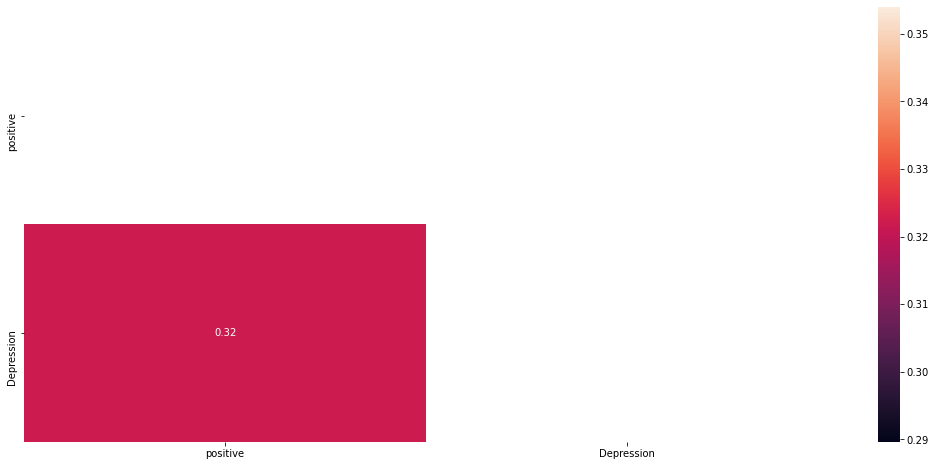

In [25]:
plt.figure(figsize=(18,8))
mask = np.zeros_like(social_pos_dep.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(social_pos_dep.corr(),annot=True,mask = mask)
plt.show()

In [90]:
data360_df = pd.read_csv('data360-ucirvinehackathon-DATAREPOSITORY-01242021.csv')
data360_df.head()
type(data360_df['description'][1])

str

In [91]:
#combine description values into one string
full_text = data360_df['description'].str.cat(sep=" ")
#remove stop words
stop_words = set(stopwords.words('english'))
stop_words_spa = set(stopwords.words('spanish'))
stop_words.update(['RT', 'https', '\'', 'de', 'la','co', 't', 'c', 'o', 'covid 19\'', 'COVID', 'COVID 19', 'COVID 19\'', '19\'', 'coronavirus', 'coronavirus\'', 't co'])
#turn string into list of words
word_tokens = word_tokenize(full_text)  
#filter out stop words
filtered_sentence = [w for w in word_tokens if not w in stop_words]  
  
filtered_sentence = []  
  
for w in word_tokens:  
    if w not in stop_words:  
        filtered_sentence.append(w)

In [92]:
print(filtered_sentence[0:10])
#combine sentence into string with type string
' '.join(filtered_sentence)
filtered_sentence = str(filtered_sentence)
type(filtered_sentence)

['All', 'measures', 'carried', 'adhering', 'strict', 'safety', 'health', 'guidelines', 'stipulated', 'health']


str

In [99]:

filtered_sentence = filtered_sentence.replace("\'", "")
filtered_sentence = filtered_sentence.replace("t.co", "")
filtered_sentence = filtered_sentence.replace("COVID-19", "")
filtered_sentence = filtered_sentence.replace("covid", "")
filtered_sentence = filtered_sentence.replace("COVID19", "")
filtered_sentence = filtered_sentence.replace("covid19", "")
filtered_sentence = filtered_sentence.replace("Covid", "")
filtered_sentence = filtered_sentence.replace("n318a4vhAi", "")
filtered_sentence = filtered_sentence.replace("n318a4vhAi vgteiPpVR9", "")
filtered_sentence = filtered_sentence.replace("Coronavirus", "")
filtered_sentence = filtered_sentence.replace("vgteiPpVR9", "")
filtered_sentence = filtered_sentence.replace("en el", "")
filtered_sentence = filtered_sentence.replace(" el ", "")
filtered_sentence = filtered_sentence.replace(" en ", "")
filtered_sentence = filtered_sentence.replace(" en", "")
filtered_sentence = filtered_sentence.replace("en ", "")
filtered_sentence = filtered_sentence.replace("said", "")
filtered_sentence = filtered_sentence.replace("US", "")
filtered_sentence = filtered_sentence.replace("ft", "")
filtered_sentence = filtered_sentence.replace("alisonmawright", "")
filtered_sentence = filtered_sentence.replace("en la", "")
filtered_sentence = filtered_sentence.replace(" one", "")
filtered_sentence = filtered_sentence.replace("one ", "")
filtered_sentence = filtered_sentence.replace("pandemic", "")

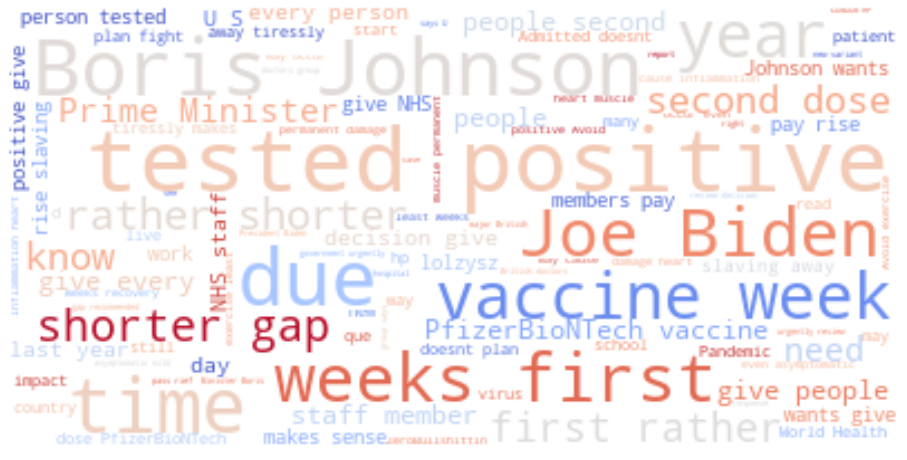

In [113]:
text = filtered_sentence

wordcloud = WordCloud(max_words=100, background_color="white",colormap='coolwarm').generate(text)
plt.figure(figsize=(16,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()